## 项目: 机票航班延误预测

欢迎来到机票航班延误预测的实战项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

我们知道，航班延误对于旅客、售卖机票的平台以及航空公司都是一个比较头疼的问题。造成航班延误的因素有很多，包括台风、雾霾、飞机故障、航空管制等等原因。在这个项目中，我们将探索在飞机起飞前2小时做航班延误预测这个实际问题，你将从实际问题出发，探索数据，抽取数据特征，构建模型并作出预测。

这个项目的数据来自[航班动态起降数据集](https://www.kesci.com/home/dataset/59793a5a0d84640e9b2fedd3)（数据集由和鲸社区提供），该数据集用2015年5月到2017年5月的机场情况作为训练集，用201年6月作为测试集。你可以通过报名该比赛获取数据集，另外，为了方便大家获取数据，我们也提供了一个[下载地址](https://static-documents.s3.cn-north-1.amazonaws.com.cn/nd101/MLND+documents/data.zip)，请下载后放置data文件夹中。

**数据说明：**


- ./data/2015年5月到2017年5月城市天气.csv
- ./data/2015年5月到2017年5月航班动态数据.csv
- ./data/2015年5月到2017年5月特情.xlsx
- ./data/机场城市对应表.xlsx


 运行下面区域的代码以载入一些此项目所需的Python库。如果成功返回提示语句，则说明载入成功。

In [1]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('你已经成功载入所需要的库！')

你已经成功载入所需要的库！


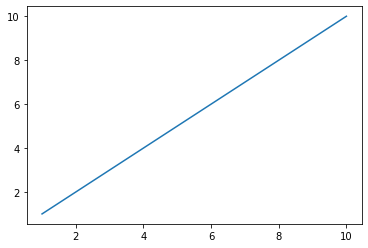

In [2]:
plt.plot(np.linspace(1,10,100),np.linspace(1,10,100))

## 数据初探

### 导入数据
我们先导入数据，然后观察头部数据。可以使用[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) 分别加载对应格式的数据，然后使用[head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)观察前5条数据。

In [3]:
# 文件路径 './data/2015年5月到2017年5月航班动态数据.csv'
# 注意使用字符编码 encoding="gb2312"
# TODO: 根据以上提示信息，导入航班数据
flight_data = pd.read_csv('./data/2015年5月到2017年5月航班动态数据.csv', encoding = 'gb2312')

# 文件路径 "./data/2015年5月到2017年5月城市天气.csv"
# TODO：根据以上提示信息，导入天气数据
weather = pd.read_csv('./data/2015年5月到2017年5月城市天气.csv')

# 文件路径 "./data/机场城市对应表.xlsx"
# TODO：根据以上提示信息，导入城市与机场对应数据
airport_city = pd.read_excel('./data/机场城市对应表.xlsx')

# 文件路径 "./data/2015年5月到2017年5月特情.xlsx"
# TODO：根据以上提示信息，导入特情数据
special = pd.read_excel('./data/2015年5月到2017年5月特情.xlsx')

/Users/fangzenan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 观察数据
使用 [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)观察前5条数据。

In [4]:
# 观察航班数据
flight_data.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常


In [5]:
flight_data.groupby('航班是否取消')['航班是否取消'].count()

航班是否取消
取消     323353
正常    7195285
Name: 航班是否取消, dtype: int64

In [6]:
flight_data[flight_data['航班是否取消']=='取消'].head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消
5,DLC,NNG,ZH953Z,1452385800,1452401700,NaN,NaN,6.0,取消
6,HGH,SZX,CZ6327,1452591900,1452600900,NaN,NaN,NaN,取消
55,HAK,SZX,HU7013,1452032700,1452037500,NaN,NaN,55.0,取消
78,WUX,SZX,MF1094,1452855300,1452864900,NaN,NaN,NaN,取消
98,CAN,URC,CZ6884,1453976100,1453996200,NaN,NaN,NaN,取消


In [7]:
# 观察天气数据
weather.head()

,城市,天气,最低气温,最高气温,日期,Unnamed: 5
0,厦门,阴,21,26,2015-05-01,NaN
1,宁德,阵雨,19,25,2015-05-01,NaN
2,莆田,阵雨转阴,20,26,2015-05-01,NaN
3,泉州,阴,22,26,2015-05-01,NaN
4,漳州,阵雨转阴,22,28,2015-05-01,NaN


In [8]:
# 通过观察，发现有一列没有用的空表格 “Unnamed: 5”，你需要使用 `del` 将其从 `weather` 数据中删除
# del weather["Unnamed: 5"]
weather.drop('Unnamed: 5', inplace=True, axis=1)

In [9]:
weather.head()

,城市,天气,最低气温,最高气温,日期
0,厦门,阴,21,26,2015-05-01
1,宁德,阵雨,19,25,2015-05-01
2,莆田,阵雨转阴,20,26,2015-05-01
3,泉州,阴,22,26,2015-05-01
4,漳州,阵雨转阴,22,28,2015-05-01


In [10]:
# 观察城市与机场对应数据
airport_city.head()

,机场编码,城市名称
0,AHJ,阿坝
1,AYN,安阳
2,HSC,韶关
3,HCJ,河池
4,XNT,邢台


In [11]:
# 观察特情数据
special.head()

,特情机场,收集时间,开始时间,结束时间,特情内容
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8时-12时雷雨，期间进出港航班可能受到影响。
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,预计，14时-17时小雷雨，期间进出港航班可能受到影响。
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。


#### 问题1：我们知道，一个有监督学习问题是总有一个需要预测的目标值，那么在这个问题中，你通过了解此问题的背景以及观察以上的数据，认为此任务中的目标值是什么？在已有的数据中，给出了预测目标值吗？如果没有的话，我们要如何获得这个目标值呢？

回答问题：

  Q1:**此任务中的目标值是什么?**   
  A1:判断飞机是否会航班延误
  
  Q2:**在已有的数据中，给出了预测目标值吗？**   
  A2:没有

  Q3:**我们要如何获得这个目标值呢**   
  A3:通过对比<u>计划起飞时间</u>和<u>实际起飞时间</u>来判断飞机起飞是否延误，如果实际起飞时间在计划起飞时间之后，则飞机延误。另外，如果航班取消了，也可看作延误来处理。
  

### 整理targets值

根据以上对数据的初步观察，我们发现，这样的实际问题的数据是非常不规整的。数据的targets标签并没有显式地给出，而是需要自己整理。在这一小节，我们根据飞行数据 `flight_data` 整理出我们需要的targets。

我们首先定义延误时间：实际起飞时间与计划起飞时间的差；然后，我们以延误时长是否超过3小时来定义targets。同时观察到“航班是否取消”这一列数据，针对数据中的“取消”的航班，我们直接可以将其延误时间设置成12小时。

**建议**：用[numpy.where](https://numpy.org/devdocs/reference/generated/numpy.where.html?highlight=where#numpy.where)按条件选择延误时间是否超过三小时，如果超过三小时则延误目标值取1，否则延误目标值取0；另外也用[numpy.where](https://numpy.org/devdocs/reference/generated/numpy.where.html?highlight=where#numpy.where)按条件选择`flight_data['航班是否取消']`是否为 `取消`,如果是取消则直接可以将其延误时间设置成12小时。

In [12]:
a = pd.to_datetime(1430409600,unit='s', errors='coerce', utc=True)
a

Timestamp('2015-04-30 16:00:00+0000', tz='UTC')

In [13]:
a.strftime("%Y-%m-%d %H:%M:%S")

'2015-04-30 16:00:00'

In [14]:
# TODO：计算 起飞延误时间，以小时为单位，注意将单位秒转换为单位小时
flight_data['起飞延误时间'] = (flight_data['实际起飞时间'] - flight_data['计划起飞时间'])/3600

In [15]:
flight_data['起飞延误时间'] = np.where(flight_data["航班是否取消"]=='取消',12.0,flight_data['起飞延误时间'])

In [16]:
flight_data[flight_data['起飞延误时间']==12.0].groupby('航班是否取消')['起飞延误时间'].count()

航班是否取消
取消    323353
正常        17
Name: 起飞延误时间, dtype: int64

In [17]:
# TODO：`flight_data['航班是否取消']是否为 “取消”,如果是取消则直接可以将其延误时间设置成12小时
flight_data["飞机延误目标"] = np.where(flight_data['起飞延误时间']>3.0,1,0)

flight_data.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0


In [18]:
flight_data['飞机延误目标'].value_counts()

0    6965819
1     552819
Name: 飞机延误目标, dtype: int64

### 整理简单features

在课程中，所讲解的案例使用的是比较干净的数据集，然而在真实业务场景里，却很少有直接可用的数据，我们往往需要从复杂的数据中提取重要的特征来帮助我们解决实际问题。正如当前所做的项目，我们无法直接使用所有数据，而是需要进行数据归并、删选、提取重要的特征。

在整理完我们的目标值之后，我们可以开始进行特征工程。根据以上的几个文件，我们可以得到很多特征，在这里，我们先抽取一个简单的特征，学习一遍在处理实际数据时的特征工程流程。

我们所抽取的特征是 `weather`中的“天气”数据。但我们发现 `weather` 中的数据并不是直接可用的，而是需要我们将该天气数据按照日期和城市对齐至飞行数据`flight_data`中。具体来说，我们参考下面的图片![merge_data](./figure/merge_feature.png)

- 我们先要将天气 `weather`中的“城市”一列的数据，通过机场城市`airport_city`数据中的“城市名称”和“城市编码”，将 `weather`中的“城市”转化为“城市编码”，这样才能跟`flight_data`中的机场编码对应上。
- 然后我们要将 `weather`中的“日期”一列的数据对齐至`flight_data`中“计划起飞时间”上。但是，我们发现“计划起飞时间”是以秒为单位的浮点格式数据，因此我们还需要将“计划起飞时间”转换成和`weather`中的“日期”一样的时间格式。

接下来就是按以上的步骤进行操作

首先，利用 [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) ，按`airport_city`中的城市名称和城市编码，将 `weather`中的城市名称转化为城市编码。

In [19]:
# TODO: 将机场编码对应到天气数据上面，根据城市名，注意 weather 数据是【城市】，而 airport_city 是【城市名称】
airport_city.rename(columns={'城市名称':'城市'},inplace=True)
airport_weather = weather.merge(airport_city, 
                                how='left',
                                on='城市',
                                indicator=True) 
airport_weather.head()

,城市,天气,最低气温,最高气温,日期,机场编码,_merge
0,厦门,阴,21,26,2015-05-01,XMN,both
1,宁德,阵雨,19,25,2015-05-01,NaN,left_only
2,莆田,阵雨转阴,20,26,2015-05-01,NaN,left_only
3,泉州,阴,22,26,2015-05-01,NaN,left_only
4,漳州,阵雨转阴,22,28,2015-05-01,NaN,left_only


In [20]:
# # 去除缺失值和重复的机场天气信息
airport_weather = airport_weather.dropna()
airport_weather = airport_weather.drop_duplicates(['日期','机场编码'])
airport_weather.head()

,城市,天气,最低气温,最高气温,日期,机场编码,_merge
0,厦门,阴,21,26,2015-05-01,XMN,both
5,龙岩,小雨转阴,20,26,2015-05-01,LCX,both
6,三明,小雨,20,25,2015-05-01,SQJ,both
8,南昌,小雨转中雨,22,27,2015-05-01,KHN,both
9,九江,雷阵雨转大雨,19,28,2015-05-01,JIU,both


我们发现，数据`airport_weather`中的“日期”格式和`flight_data`中的“计划起飞时间”格式是不一致的，为了能够将机场天气数据`airport_weather`按照“日期”归并至飞行数据`flight_data`中，我们首先需要将`flight_data`中的“计划起飞时间”格式转化成年月日统一格式。可以先用[to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)将浮点类型的数据转化为日期格式，然后再将日期格式的数据转化为 统一的 年月日格式。

In [21]:
# TODO：利用 to_datetime  浮点类型的数据转化为时间数据，单位为秒，utc时间为True
flight_data['计划起飞日期tmp'] = pd.to_datetime(flight_data['计划起飞时间'], unit='s',utc=True)
flight_data.head()


,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0,2016-01-14 08:40:00+00:00
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0,2016-01-26 09:35:00+00:00
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0,2016-01-06 22:50:00+00:00
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0,2016-01-10 04:10:00+00:00


In [22]:
# 再将日期格式的数据转化为 统一的 年月日格式。
flight_data['计划起飞日期'] = flight_data['计划起飞日期tmp'].apply(lambda x:x.strftime('%Y-%m-%d') if not(pd.isnull(x)) else None)
flight_data.head()


,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00,2016-01-26
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0,2016-01-14 08:40:00+00:00,2016-01-14
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0,2016-01-26 09:35:00+00:00,2016-01-26
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0,2016-01-06 22:50:00+00:00,2016-01-06
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0,2016-01-10 04:10:00+00:00,2016-01-10


然后，再次利用[merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)，根据机场名称和日期信息，将机场天气`weather`数据对应到飞行数据 `flight_data` 中。注意，`flight_data`中是“出发机场”和“计划起飞日期”,而 `airport_weather`中对应的是“机场编码”和“日期”。

In [23]:
# TODO: merge flight_data 和 airport_weather
flight_data_all = flight_data.merge(airport_weather, 
                                how='inner',
                                left_on=['出发机场','计划起飞日期'],
                                right_on=['机场编码','日期'])

flight_data_all.drop(['日期','机场编码','_merge'],inplace=True, axis=1)

flight_data_all.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期,城市,天气,最低气温,最高气温
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00,2016-01-26,杭州,晴转阴,1,7
1,HGH,BFJ,GJ8823,1453848600,1453858800,1.453850e+09,1.453860e+09,33.0,正常,0.250000,0,2016-01-26 22:50:00+00:00,2016-01-26,杭州,晴转阴,1,7
2,HGH,GYS,CA1773,1453767600,1453777800,1.453768e+09,1.453778e+09,1528.0,正常,0.183333,0,2016-01-26 00:20:00+00:00,2016-01-26,杭州,晴转阴,1,7
3,HGH,HRB,CZ6665,1453780800,1453791900,1.453781e+09,1.453792e+09,1185.0,正常,-0.016667,0,2016-01-26 04:00:00+00:00,2016-01-26,杭州,晴转阴,1,7
4,HGH,SHE,CZ3909,1453784700,1453794300,1.453785e+09,1.453794e+09,433.0,正常,0.166667,0,2016-01-26 05:05:00+00:00,2016-01-26,杭州,晴转阴,1,7


In [24]:
flight_data.shape, flight_data_all.shape

((7518638, 13), (7396406, 17))

In [25]:
flight_data[(flight_data['航班是否取消']=='正常') & (flight_data['计划起飞日期'].isnull())]

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期


In [74]:
flight_target_weather_p = flight_data_all[['飞机延误目标','天气']].pivot_table(columns='飞机延误目标', index='天气', aggfunc=len)
flight_target_weather_p['sum']=flight_target_weather_p.sum(axis=1)
flight_target_weather_p['delay_pct'] = flight_target_weather_p[1]/flight_target_weather_p['sum']

In [77]:
flight_target_weather_p[flight_target_weather_p[1]>=1000].sort_values(by='delay_pct', ascending=False).head(10)

飞机延误目标,0,1,sum,delay_pct
天气,,,,
中雪转小雪,1898.0,1330.0,3228.0,0.412020
暴雨转中雨,3253.0,1906.0,5159.0,0.369451
暴雨转大雨,4542.0,2155.0,6697.0,0.321786
大雨转阴,3043.0,1028.0,4071.0,0.252518
大雨转暴雨,4258.0,1390.0,5648.0,0.246105
大雨,17577.0,4548.0,22125.0,0.205559
雷阵雨转大雨,9080.0,2020.0,11100.0,0.181982
雷阵雨转中雨,16551.0,3680.0,20231.0,0.181899
小雪,8120.0,1799.0,9919.0,0.181369


In [78]:
flight_target_city_p = flight_data_all[['飞机延误目标','城市']].pivot_table(columns='飞机延误目标', index='城市', aggfunc=len)


In [79]:
flight_target_city_p['sum']=flight_target_city_p.sum(axis=1)
flight_target_city_p['delay_pct'] = flight_target_city_p[1]/flight_target_city_p['sum']

In [81]:
flight_target_city_p[flight_target_city_p[1]>=1000].sort_values(by='delay_pct', ascending=False).head(15)

飞机延误目标,0,1,sum,delay_pct
城市,,,,
铜仁,10266.0,1596.0,11862.0,0.134547
喀什,13554.0,1825.0,15379.0,0.118668
珠海,48564.0,6176.0,54740.0,0.112824
库尔勒,10839.0,1340.0,12179.0,0.110025
石家庄,57373.0,6806.0,64179.0,0.106047
拉萨,29467.0,3423.0,32890.0,0.104074
伊宁,9298.0,1071.0,10369.0,0.103289
包头,17295.0,1968.0,19263.0,0.102165
阿克苏,10498.0,1175.0,11673.0,0.100660


## 建立简单模型

### 特征处理
我们可以先建立一个最简单的模型，从飞行数据`flight_data`中挑选2列数据作为features，其中一个是我们刚刚构造好的“天气”数据，另外一个feature由你来选择。注意，其中“飞机延误时间”和“飞机延误目标”并不是feature，而是targets，所以不能选择这两列作为features。

#### 问题2：你选择的特征是特征是什么？说说你选择这个feature的理由。

回答问题：**城市**。1.根据日常经验，飞机延误的概率跟所在的机场是密切相关的，背后涉及到的是城市所在的地形，如盆地，高原，沿海城市等，城市机场建设情况，航线安排优化情况等；2.通过简单的分析，发现在延误案例超过1000例以上的城市，城市延误的占比差异还是比较大的。

In [93]:
# TODO: 选择一列数据作为feature
features = ["天气"]
add_to_feature = '城市'   # 你选择的feature
features.append(add_to_feature)
data = flight_data_all[features]

data.head()


,天气,城市
0,晴转阴,杭州
1,晴转阴,杭州
2,晴转阴,杭州
3,晴转阴,杭州
4,晴转阴,杭州


In [96]:
data['天气'].nunique()

240

In [94]:
# TODO：从 flight_data 中取出目标"飞机延误目标"的值，numpy格式的值
targets = np.array(flight_data_all['飞机延误目标'])

# train_data 的数据量和 targets 的数据量一定是相等的
assert len(data) == len(targets)

到这里，我们已经提取完并得到两个特征，但是现在的特征是非数值类型的，那么我们需要先对这些非数值类型的特征进行编码。

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码**方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

| 特征X |                    | 特征X_A | 特征X_B | 特征X_C |
| :-: |                            | :-: | :-: | :-: |
|  B  |  | 0 | 1 | 0 |
|  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
|  A  |  | 1 | 0 | 0 |

因此，**独热编码**将会对特征进行扩维，例如上面对例子，将对单个特征`someFeature` 扩充成3个特征`someFeature_A`, `someFeature_B`和`someFeature_C`，这种独热编码，你可以参考one-hot[get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) 解释和实现以及使用。

另一种对非数值类型的特征进行编码的方法是直接对字符编号，例如 `someFeature` 由 1.0、2.0、3.0 来作为特征值进入模型对计算。更进一步来说，这种方法如果类型比较多的话，将会导致特征空间太离散，影响模型对建模性能。于是我们需要对这些数值进行归一化，针对该问题，在我们实际业务场景中经常使用的解决方案是使用的编码方式是 [sklearn.preprocessing.LabelEncoder.fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)，它会将离散的字符映射到一个数值，用以表示该特征并参与模型计算。


#### 问题3：请参考文档简单介绍一下 `LabelEncoder.fit_transform`，说一下该方法和独热表示one-hot[get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)有什么区别，并根据刚刚构造好的`天气`特征包含的类别数量等统计信息来回答这里为什么用 `fit_transform`？

回答问题：

Q1
  1. one-hot对特征的扩散不包含特征的逻辑关系，如先后顺序，大小关系等。而LabelEncoder的处理可以包含特征的逻辑关系；
  2. 如果某特征包含很多类别的时候，如有100种类别的时候，one-hot会导致数据集极大膨胀，导致算法训练得很慢，甚至训练不出来。而LabelEncoder没有这样的问题
  
Q2
  1. 一共包含了240种不一样的天气，如果采用one-hot的话，会导致数据集极大膨胀，所以采用LabelEncoder fit_transform的方法
  

判断数据中是否存在缺省值的情况，如果存在，请处理缺省值。

建议，你可以通过 `any(isnull())`[isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)去判断数据中是否存在缺失情况；然后通过[fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)去填补缺省值

In [106]:
# TODO：判断并处理`data`中的缺省值
data.loc[data['城市'].isnull()==True,:]

,天气,城市


In [113]:
data.isnull().sum()

天气    0
城市    0
dtype: int64

In [114]:
data['城市'].nunique()

191

In [115]:
from sklearn import preprocessing
string_encoder = preprocessing.LabelEncoder()
# 我们首先对天气特征的进行编码
data["天气"] = string_encoder.fit_transform(data["天气"])

# TODO：对你选择的特征进行编码，如果你选择的是数值类型的特征，那么你可以按照前面所学知识进行归一化等处理
data[add_to_feature] = string_encoder.fit_transform(data['城市'])

/Users/fangzenan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/fangzenan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [120]:
string_encoder.inverse_transform(data["城市"])

array(['杭州', '杭州', '杭州', ..., '阿里', '汉中', '永州'], dtype=object)

In [121]:
data.head()

,天气,城市
0,123,105
1,123,105
2,123,105
3,123,105
4,123,105


### 模型构建

现在我们可以根据上面构造好的feature和target来构建一个简单的模型。

- 第一步：使用`sklearn.model_selection.train_test_split`按**0.2**的测试比例切分训练集和测试集；
- 第二步：继续使用`sklearn.model_selection.train_test_split`按**0.2**的测试比例把训练集切分训练集和验证集；


In [122]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'data'和'targets'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = 0.2, random_state = 0)

# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# 显示切分的结果
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Validation set has {} samples.".format(X_val.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4733699 samples.
Validation set has 1183425 samples.
Testing set has 1479282 samples.


### 监督学习模型
### 模型应用

你能够在 [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) 中选择以下监督学习模型
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树 (DecisionTree)
- 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K近邻 (K Nearest Neighbors)
- 随机梯度下降分类器 (SGDC)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）



#### 问题4: 从上面的监督学习模型中选择两个适合我们这个问题的模型，并回答相应问题。然后从中选择一个先在我们的数据集上进行训练和测试，这一步是为了初步感受模型在此数据集上的表现。

#### 模型1

**模型名称**

回答：决策树 (DecisionTree)


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：决策树模型目前是很多模型的基石模型，实际的应用有：用于期权定价,企业决策项目： http://www.jeepxie.net/article/394316.html

**这个模型的优势是什么？他什么情况下表现最好？**

回答：
1. 虽然生成的树不容易给用户看，但是数据分析的时候，通过观察树的上层结构，能够对分类器的核心思路有一个直观的感受，有助于算法和非算法同学（业务方）理解，得出结论；
2. 使用比较方便，训练模型的时候，能够穷举问题的所有情况；
3. 能够同时连续型特征和离散特征；
4. 一般不需要做什么数据预处理，如归一化处理。

其在训练集的时候可以表现得非常好


**这个模型的缺点是什么？什么条件下它表现很差？**

回答：
1. 容易过拟合，泛化能力一般。导致要预测从未出现的数据结果的时候，预测效果比较差，也就是在测试集的表现一般； 
2. 不能直接获取特征间的逻辑关系，如特征间的相关性、大小关系、时间序列关系等，对这类型特征需要做比较多的预处理

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：
1. 当前数据集包含了离散特征；
2. 当前没有对特征做过多的预处理和特征组合；
3. 对分类问题，很多时候会用决策树作为baseline模型，既表现不会太差也不会太好

#### 模型2

**模型名称**

回答：集成方法中的随机森林 Random Forest


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：在金融领域，判断一个人是否有信用风险；[参考出处](https://www.kdnuggets.com/2019/09/ensemble-learning.html)

**这个模型的优势是什么？他什么情况下表现最好？**

回答：
1. 集成算法是采用“三个臭皮匠，胜过一个诸葛亮”的策略，是弱弱联合，能够大大提升单个模型的缺点，如决策树会过拟合，导致高方差，而随机森林能够降低决策树高方差的问题；
2. 跟决策树一样，不需要做太多的特征预处理，如归一化处理，而且能够获得一个不错的效果，属于立刻能上手的模型；
3. 能够输出特征重要性，帮助业务决策

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：

1. 随机森林已经被证明在某些噪音较大的分类或回归问题上会过拟；
2. 对于有不同取值的属性的数据，取值划分较多的属性会对随机森林产生更大的影响，所以随机森林在这种数据上产出的属性权值不一定可信；
3. 执行速度比单个决策树慢不少；
4. 没有决策树那么好让人理解
5. 数据如果比较少，训练效果一般

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：
1. 目前没有做太多的预处理
2. 数据量级足够
3. 能帮助我们较快速度得到一个效果不错的预测模型

### 评价模型性能
在这一部分中，我们选择上面两个模型之一来训练。

在这个，分类预测问题中，我们使用**准确率**作为评价模型等标准，同时能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当 $\beta = 0.5$ 的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。


由于数据量比较大，模型训练可能需要一些时间来运行！

In [128]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

# TODO：从sklearn中导入上面你选择等一个监督学习模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# TODO：设置模型参数，初始化这个模型
dt_model = DecisionTreeClassifier()


# TODO：在训练集 X_train, y_train 上训练该模型
dt_model.fit(X_train, y_train)

# TODO：在验证集 X_val, y_val 上预测并计算socre fbeta_score和accuracy_score

y_val_pre = dt_model.predict(X_val)

f_score = fbeta_score(y_val, y_val_pre, beta=1)
acc = accuracy_score(y_val, y_val_pre)

# 打印 fbeta_score和accuracy_score
print("Train and valid successed. F-score: {}, Acc: {}".format(f_score, acc))


Train and valid successed. F-score: 0.04304646833933368, Acc: 0.9274520987810804


In [130]:
len(y_train), y_train.sum()

(4733699, 346117)

#### 问题5： 用通俗的话解释模型

*用一到两段话，用外行也听得懂的话来解释最终模型是如何工作的。你需要解释所选模型的主要特点。例如，这个模型是怎样被训练的，它又是如何做出预测的。避免使用高级的数学或技术术语，不要使用公式或特定的算法名词。*

回答问题：

上面用了决策树模型，其工作原理如下：
  1. 通过计算某个函数来判断哪个特征对判断目标函数影响更大，最大的特征作为决策树的第一个决策节点，比方说上面选择了<u>天气和城市</u>两个特征，经过计算发现天气的影响更大，则以天气作为第一个节点进行分割；
  2. 后面以此类推，直到遍历了所有条件或者达到业务目标的要求

### 练习：模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 设置`random_state` (如果有这个参数)。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

In [131]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [132]:
# TODO：初始化分类器
clf = RandomForestClassifier(random_state=1)


In [158]:
# TODO：创建你希望调节的参数列表
parameters = {'n_estimators':[30,50,100]}


In [159]:
# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(fbeta_score, beta=0.5)


In [160]:
# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf,param_grid=parameters,scoring=scorer)


In [161]:
# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train,y_train)

/Users/fangzenan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [162]:
# 得到estimator
best_clf = grid_obj.best_estimator_
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

In [164]:
f_score_best = fbeta_score(y_val, best_predictions, beta=0.5)
f_score_not_best = fbeta_score(y_val, predictions, beta=0.5)

print (f'The f-score for best predictions: {f_score_best}')
print (f'The f-score for not best predictions: {f_score_not_best}')

The f-score for best predictions: 0.10053747718495064
The f-score for not best predictions: 0.09999899143730269


In [166]:
clf.feature_importances_

array([0.63626129, 0.36373871])

### 特征重要性分析
在做数据分析过程中，我们需要分析抽取出来的特征对预测的贡献，以得出特征的重要性。特征重要性分析能够帮助我们继续进行相关的特征工程，比如过滤一些没有贡献的特征，加强一些比较重要的特征。


选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

在下面的代码单元中，你将要实现以下功能：
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的 `'feature_importances_'`提取特征的重要性。

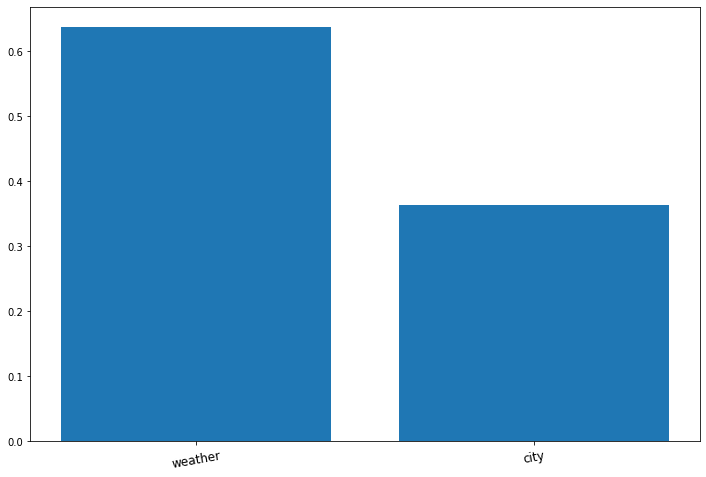

In [167]:
# TODO：导入一个有'feature_importances_'的监督学习模型

# # TODO：在训练集上训练一个监督学习模型，初始化
# model = None
# # TODO: fit 训练集
# model.fit()


import matplotlib.pyplot as plt
features = ["weather", "city"]

feature_important = clf.feature_importances_
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(features)),feature_important)
plt.xticks(np.arange(len(features)),features,fontsize=12,rotation=10)
plt.show()


#### 问题6：哪一个特征更加重要？这符合你的直觉吗？谈谈你在平时的项目中在做特征工程时，对于使用符合直觉的特征的看法，可以举例说明。

回答问题：天气更加重要。这符合我的直接。我在处理人群优选模型的时候，会把人群的属性，购买历史数据考虑进去，因为这与人群后续的行为密切相关，但不会把该用户的在购物中的评价放进去，因为评价这个特征不直接影响这个人是不是某品牌、某行业的高潜人群。

## 模型对比

目前为止，我们已经对一个实际问题的复杂的数据进行了处理，并抽取了一两个特征，然后进行了模型训练。你可以按照这个流程做更多的特征工程的工作。由于数据量大，我们已经做好了特征工程，同时我们也sample了部分数据，方便接下来对不同模型进行比较。

这一小节，我们要学习在具体业务场景经常使用的模型，梯度提升决策树 （Gradient Boosting Decison Tree，GBDT）。GBDT在工业场景和各大数据挖掘比赛中都是非常流行的模型，在这里，我们尝试对这些流行对模型进行初探。

#### 问题7：通俗的解释什么是 梯度提升决策树 （Gradient Boosting Decison Tree，GBDT）？并列举其优缺点。

回答问题：
GBDT(Gradient Boosting Decision Tree) 又叫 MART（Multiple Additive Regression Tree)，是一种迭代的决策树算法，该算法由多棵决策树组成，所有树的结论累加起来做最终答案。它在被提出之初就和SVM一起被认为是泛化能力较强的算法。
GBDT中的树是回归树（不是分类树），GBDT用来做回归预测，调整后也可以用于分类。

其原理是每一次建立树模型是在之前建立模型损失函数的梯度下降方向。即利用了损失函数的负梯度在当前模型的值作为回归问题提升树算法的残差近似值，去拟合一个回归树。

优点
* 预测精度高
* 适合低维数据
* 能处理非线性数据
* 可以灵活处理各种类型的数据，包括连续值和离散值。
* 在相对少的调参时间情况下，预测的准备率也可以比较高。这个是相对SVM来说的。
* 使用一些健壮的损失函数，对异常值的鲁棒性非常强。比如 Huber损失函数和Quantile损失函数。

缺点
* 由于弱学习器之间存在依赖关系，难以并行训练数据。不过可以通过自采样的SGBT来达到部分并行。
* 如果数据维度较高时会加大算法的计算复杂度
* 相比Random Forest， GBDT有更多的超参数需要调整以达到比较好的效果，如果调参调得好的话，其效果比Random Forest要好

参考文章：
* [GBDT原理及利用GBDT构造新的特征](https://blog.csdn.net/shine19930820/article/details/71713680)
* [GBDT算法的优缺点](https://blog.csdn.net/suv1234/article/details/72588048)
* [What are the advantages/disadvantages of using Gradient Boosting over Random Forests?](https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests)




#### 问题8：目前比较流行的 `GBDT`的变种有 [Xgboost](https://xgboost.readthedocs.io/en/latest/) 和 [LightGBM](https://lightgbm.readthedocs.io/en/latest/)，请比较这三个梯度提升模型，列举他们各自的特点? （你可以参考一些文档，并给出你的引用出处）

回答问题：

**GBDT**

　提GBDT之前，谈一下Boosting，Boosting是一种与Bagging很类似的技术。不论是Boosting还是Bagging，所使用的多个分类器类型都是一致的。但是在前者当中，不同的分类器是通过串行训练而获得的，每个新分类器都根据已训练的分类器的性能来进行训练。Boosting是通过关注被已有分类器错分的那些数据来获得新的分类器。
 
　由于Boosting分类的结果是基于所有分类器的加权求和结果的，因此Boosting与Bagging不太一样，Bagging中的分类器权值是一样的，而Boosting中的分类器权重并不相等，每个权重代表对应的分类器在上一轮迭代中的成功度。
 
<u>原理</u>

　　GBDT与传统的Boosting区别较大，它的每一次计算都是为了减少上一次的残差，而为了消除残差，我们可以在残差减小的梯度方向上建立模型,所以说，在GradientBoost中，每个新的模型的建立是为了使得之前的模型的残差往梯度下降的方法，与传统的Boosting中关注正确错误的样本加权有着很大的区别。
  
　　在GradientBoosting算法中，关键就是利用损失函数的负梯度方向在当前模型的值作为残差的近似值，进而拟合一棵CART回归树。
  
　　GBDT的会累加所有树的结果，而这种累加是无法通过分类完成的，因此GBDT的树都是CART回归树，而不是分类树（尽管GBDT调整后也可以用于分类但不代表GBDT的树为分类树）。
  
<u>优缺点</u>

GBDT的性能在RF的基础上又有一步提升，因此其优点也很明显
1. 它能灵活的处理各种类型的数据；
2. 在相对较少的调参时间下，预测的准确度较高。
当然由于它是Boosting，因此基学习器之前存在串行关系，难以并行训练数据。

**XGBoost**
<u>原理</u>

　　XGBoost的性能在GBDT上又有一步提升，而其性能也能通过各种比赛管窥一二。坊间对XGBoost最大的认知在于其能够自动地运用CPU的多线程进行并行计算，同时在算法精度上也进行了精度的提高。
  
　　由于GBDT在合理的参数设置下，往往要生成一定数量的树才能达到令人满意的准确率，在数据集较复杂时，模型可能需要几千次迭代运算。但是XGBoost利用并行的CPU更好的解决了这个问题。
  
<u>优缺点</u>

优点

1. 传统的GBDT以CART树作为基学习器，XGBoost还支持线性分类器，这个时候XGBoost相当于L1和L2正则化的逻辑斯蒂回归（分类）或者线性回归（回归）。传统的GBDT在优化的时候只用到一阶导数信息，XGBoost则对代价函数进行了二阶泰勒展开，得到一阶和二阶导数；
2. XGBoost在代价函数中加入了正则项，用于控制模型的复杂度。从权衡方差偏差来看，它降低了模型的方差，使学习出来的模型更加简单，放置过拟合，这也是XGBoost优于传统GBDT的一个特性；
3. shrinkage（缩减），相当于学习速率（XGBoost中的eta）。XGBoost在进行完一次迭代时，会将叶子节点的权值乘上该系数，主要是为了削弱每棵树的影响，让后面有更大的学习空间。（GBDT也有学习速率）；
4. 列抽样。XGBoost借鉴了随机森林的做法，支持列抽样，不仅防止过 拟合，还能减少计算；
5. 对缺失值的处理。对于特征的值有缺失的样本，XGBoost还可以自动 学习出它的分裂方向；
6. XGBoost工具支持并行。Boosting不是一种串行的结构吗?怎么并行 的？注意XGBoost的并行不是tree粒度的并行，XGBoost也是一次迭代完才能进行下一次迭代的（第t次迭代的代价函数里包含了前面t-1次迭代的预测值）。XGBoost的并行是在特征粒度上的。我们知道，决策树的学习最耗时的一个步骤就是对特征的值进行排序（因为要确定最佳分割点），XGBoost在训练之前，预先对数据进行了排序，然后保存为block结构，后面的迭代 中重复地使用这个结构，大大减小计算量。这个block结构也使得并行成为了可能，在进行节点的分裂时，需要计算每个特征的增益，最终选增益最大的那个特征去做分裂，那么各个特征的增益计算就可以开多线程进行。
  
缺点

1. level-wise 建树方式对当前层的所有叶子节点一视同仁，有些叶子节点分裂收益非常小，对结果没影响，但还是要分裂，加重了计算代价。
2. 预排序方法空间消耗比较大，不仅要保存特征值，也要保存特征的排序索引，同时时间消耗也大，在遍历每个分裂点时都要计算分裂增益(不过这个缺点可以被近似算法所克服)
  
**lightGBM** 与 **XGboost**对比

1. xgboost采用的是level-wise的分裂策略，而lightGBM采用了leaf-wise的策略，区别是xgboost对每一层所有节点做无差别分裂，可能有些节点的增益非常小，对结果影响不大，但是xgboost也进行了分裂，带来了务必要的开销。 leaft-wise的做法是在当前所有叶子节点中选择分裂收益最大的节点进行分裂，如此递归进行，很明显leaf-wise这种做法容易过拟合，因为容易陷入比较高的深度中，因此需要对最大深度做限制，从而避免过拟合。
2. lightgbm使用了基于histogram的决策树算法，这一点不同与xgboost中的 exact 算法，histogram算法在内存和计算代价上都有不小优势。
  - 2.1 内存上优势：很明显，直方图算法的内存消耗为(#data* #features * 1Bytes)(因为对特征分桶后只需保存特征离散化之后的值)，而xgboost的exact算法内存消耗为：(2 * #data * #features* 4Bytes)，因为xgboost既要保存原始feature的值，也要保存这个值的顺序索引，这些值需要32位的浮点数来保存。
  - 2.2 计算上的优势，预排序算法在选择好分裂特征计算分裂收益时需要遍历所有样本的特征值，时间为(#data),而直方图算法只需要遍历桶就行了，时间为(#bin)
3. 直方图做差加速
一个子节点的直方图可以通过父节点的直方图减去兄弟节点的直方图得到，从而加速计算。
4. lightgbm支持直接输入categorical 的feature
在对离散特征分裂时，每个取值都当作一个桶，分裂时的增益算的是”是否属于某个category“的gain。类似于one-hot编码。
5. 多线程优化

参考文章：
* https://blog.csdn.net/data_scientist/article/details/79022025
* http://blog.csdn.net/qq_28031525/article/details/70207918
* https://www.cnblogs.com/mata123/p/7440774.html
* https://www.cnblogs.com/infaraway/p/7890558.html

我们已经预先对该数据做了充分的特征工程，然后 `sample` 出了部分数据。数据在路径 `./data/`下面，有训练集`train.csv`和测试集`test.csv`

In [214]:
# 直接运行读取数据，并分别得到 X 和 Y 的数据

# 处理训练集
train_x = pd.read_csv("./data/train.csv")
train_y = train_x["飞机延误目标"].values
del(train_x["飞机延误目标"])
del(train_x['Unnamed: 0'])
# # 处理测试集
test_x = pd.read_csv("./data/test.csv")
test_y = test_x["飞机延误目标"].values
del(test_x["飞机延误目标"])
del(test_x['Unnamed: 0'])

In [215]:
train_x.head()

,出发机场,到达机场,航班编号,飞机编号,计划飞行时间,计划起飞时刻,航班月份,计划到达时刻,前序延误,起飞间隔,到达特情,出发特情,出发天气,出发气温,到达天气,到达气温,航空公司,航班性质
0,393,149,16869,0.0,1.916667,3,5,5,0.458428,4.520489,0,0,97,0,25,0,73,1
1,423,434,27063,0.0,1.916667,3,10,5,0.458428,4.520489,0,0,87,0,16,0,164,1
2,1,230,11629,0.0,0.666667,9,9,9,0.458428,4.520489,0,0,82,0,64,0,57,0
3,320,261,3946,0.0,3.416667,8,5,11,0.458428,4.520489,0,0,64,0,97,0,32,1
4,115,323,14414,0.0,1.416667,14,5,15,0.458428,4.520489,0,0,124,0,16,0,66,1


In [216]:
train_x.shape, test_x.shape

((20000, 18), (6000, 18))

### 对 gbdt 进行调参

按照上面简单模型构建部分的流程，先定义一个梯度提升决策树分类器 GradientBoostingClassifier，并设置里面固定参数；然后设置需要调优的参数，然后通过 网格搜索 `GridSearchCV` 进行搜索最优参数。由于数据量已经减少，这里你可以将参数设置的大一些，以提升模型的准确度，但要防止过拟合。

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import time



# TODO: 需要调的参数，比如 max_depth, n_estimators, learning_rate
cv_params = {'max_depth':[i for i in range(3,9)],
             'n_estimators':[i for i in range(50,201,50)],
             'learning_rate':[i/100 for i in range(5,50,10)]}

time_start = time.time()
#TODO：设置 GBDT 分类器 GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=1, loss='exponential')
# TODO: 设置 GridSearchCV
grid_cv = GridSearchCV(model, param_grid=cv_params, cv=5, scoring='roc_auc', n_jobs=-1)
# TODO: 模型训练
grid_cv.fit(train_x, train_y)


# TODO：在测试集上预测，并计算accuracy和f-score
best_model = grid_cv.best_estimator_
best_pred = best_model.predict(test_x)
f_score = fbeta_score(test_y, best_pred, beta=0.5)
acc = accuracy_score(test_y, best_pred)



# TODO：打印最优参数
print ('The best parameters set is: %s ' %grid_cv.best_estimator_.get_params())
print ('F-score: %s' %f_score)
print ('Accuracy: %s' %acc)
print ('Time Consumer: %s' %(time.time()-time_start))

The best parameters set is: {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.15, 'loss': 'exponential', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 
F-score: 0.9921617161716171
Accuracy: 0.981
Time Consumer: 553.7827138900757


In [230]:
print ('Precision Score:', precision_score(test_y, best_pred))
print ('Recall Score:', recall_score(test_y, best_pred))

Precision Score: 1.0
Recall Score: 0.962


In [219]:
test_x.columns

Index(['出发机场', '到达机场', '航班编号', '飞机编号', '计划飞行时间', '计划起飞时刻', '航班月份', '计划到达时刻',
       '前序延误', '起飞间隔', '到达特情', '出发特情', '出发天气', '出发气温', '到达天气', '到达气温', '航空公司',
       '航班性质'],
      dtype='object')

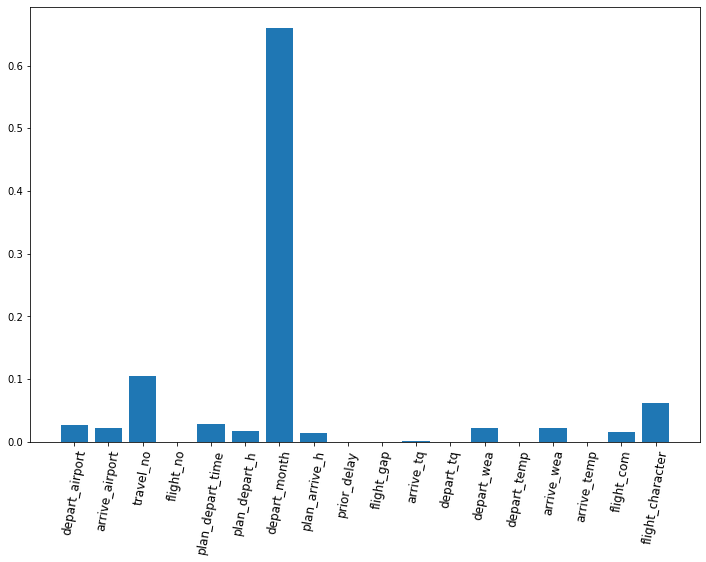

In [225]:
features = ['depart_airport','arrive_airport','travel_no','flight_no','plan_depart_time','plan_depart_h','depart_month',
            'plan_arrive_h','prior_delay','flight_gap','arrive_tq','depart_tq','depart_wea','depart_temp','arrive_wea','arrive_temp','flight_com','flight_character']
feature_important = best_model.feature_importances_
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(test_x.columns)),feature_important)
plt.xticks(np.arange(len(test_x.columns)),features,fontsize=12,rotation=80)
plt.show()

### 对 Xgboost 进行调参
关于xgboost 的参数设置和调参与gbdt类似，参数也是类似的，比如 `n_estimators`表示树的个数；`max_depth`表示构建树的深度，越大越容易过拟合；`gamma`表示用于控制是否后剪枝的参数；`reg_lambda`是用来控制模型复杂度的L2正则化的参数，值越大，模型越不容易过拟合，等等。由于数据量已经减少，这里你可以将参数设置的大一些，以提升模型的准确度，但要防止过拟合。

如果没有安装过xgboost，你需要先运行以下代码来安装 xgboost

!pip install xgboost

In [226]:
### 使用Xgboost 进行训练和测试
import xgboost as xgb

In [227]:
# TODO: 选择要调优的参数, 比如max_depth, n_estimator,learning_rate
cv_params = {'max_depth':[i for i in range(3,9)],
             'n_estimators':[i for i in range(50,501,50)],
             'learning_rate':[0.05,0.1,0.15, 0.2]}
model = xgb.XGBClassifier()

start_time = time.time()
grid_cv = GridSearchCV(model, param_grid=cv_params, cv=5, scoring=scorer, n_jobs=-1)
grid_cv.fit(train_x, train_y)


# TODO：在测试集上预测，并计算准确率
best_model = grid_cv.best_estimator_

# TODO：预测测试集的结果
predict_y = best_model.predict(test_x)
# TODO：计算 准确率
f_score = fbeta_score(test_y, predict_y, beta=0.5)
auc = accuracy_score(test_y, predict_y)

# 打印准确率结果
print("准确率：{}".format(auc))
print ('F-score',f_score)

# TODO：打印最优参数
print ('Best Parameters:', grid_cv.best_estimator_.get_params())
print ('Time Consumption:', (time.time()-start_time))

准确率：0.9803333333333333
F-score 0.9918777533039649
Best Parameters: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 1, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
Time Consumption: 1718.988823890686


In [228]:
from sklearn.metrics import precision_score, recall_score

In [229]:
print ('Precision Score:', precision_score(test_y, predict_y))
print ('Recall Score:', recall_score(test_y, predict_y))

Precision Score: 1.0
Recall Score: 0.9606666666666667


#### 问题9：在这个任务中，`GBDT`和`xgboost`的性能如何？哪一个更优？通过此次对比和调参过程，总结你对**梯度提升决策树**调参的经验与总结

回答问题：

GBDT和xgboost的性能都很不错，precision和recall都很高。在这个任务下，两者的表现是相当的。

**GBDT调优的经验总结**

1) 划分时考虑的最大特征数max_features: 可以使用很多种类型的值，默认是"None",意味着划分时考虑所有的特征数；如果是"log2"意味着划分时最多考虑$log_2N$个特征；如果是"sqrt"或者"auto"意味着划分时最多考虑$\sqrt{N}$个特征。如果是整数，代表考虑的特征绝对数。如果是浮点数，代表考虑特征百分比，即考虑（百分比xN）取整后的特征数。其中N为样本总特征数。一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。

2) 决策树最大深度max_depth: 默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。

3) 内部节点再划分所需最小样本数min_samples_split: 这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2.如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

4) 叶子节点最少样本数min_samples_leaf: 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

5）叶子节点最小的样本权重和min_weight_fraction_leaf：这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

6) 最大叶子节点数max_leaf_nodes: 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。

7) 节点划分最小不纯度min_impurity_split:  这个值限制了决策树的增长，如果某节点的不纯度(基于基尼系数，均方差)小于这个阈值，则该节点不再生成子节点。即为叶子节点 。一般不推荐改动默认值1e-7。